In [ ]:
#!pip install gym_super_mario_bros==7.3.0 nes_py

In [2]:
#Import the game
import gym_super_mario_bros
#Import Joypad Wrapper
from nes_py.wrappers import JoypadSpace
#Import simplified controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
#Setup the game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [ ]:
# #Running the Game
# #Create flag
# done = True
# #Loop through each frame of the game
# for step in range(10000):
#     #Start the game first
#     if done:
#         #Start game
#         env.reset()
#     #Do random actions
#     state, reward, done, info = env.step(env.action_space.sample())
#     #Show game on screen
#     env.render()
# #Close the game
# env.close()

In [ ]:
#Install PyTorch
#!pip install torch torchvision torchaudio

In [ ]:
#Install Stable Baselines3 for RL
#!pip install stable-baselines3[extra]

In [4]:
#Import Frame Stacker and Grayscaling Wrappers
from gym.wrappers import GrayScaleObservation
#Import Vectorization Wrapper
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
#import Matplotlib to see impact of Frame Stacking
from matplotlib import pyplot as plt

In [5]:
# 1. Create base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify controllers
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale everything
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [6]:
state = env.reset()

In [7]:
state, reward, done, info = env.step([env.action_space.sample()])

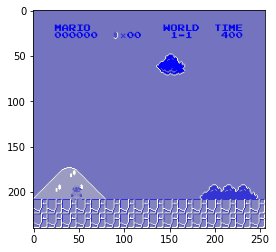

In [8]:
#Matplotlib to see the frames
plt.imshow(state[0])

# Train the RL Model

In [9]:
#Import os for file management
import os 
#Import PPO for algorithms
from stable_baselines3 import PPO
#Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback 

In [10]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose = 1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
    
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [11]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [12]:
#Setup Model Saving Callback
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)

In [13]:
#AI Model Started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [13]:
#Train AI model
#Add callback=callback if needed to save the states created
model.learn(total_timesteps=1000000, callback=callback)

KeyboardInterrupt: 

In [22]:
model.save('./train/testmodel')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:276: UserWarning: Path 'train' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


# Test Out the Model

In [14]:
#Load Model
model = PPO.load('./train/testmodel.zip')

In [15]:
#Start game
state = env.reset()
#Loop throughout game
while True:

    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

2023-02-23 11:17:26.976 Python[3278:38839] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/7n/62525jfd52q__72l6v12gxfm0000gn/T/org.python.python.savedState
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

: 